In [ ]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


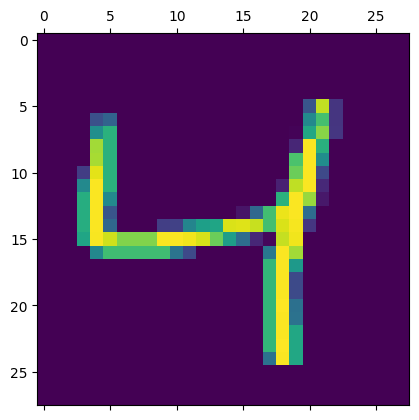

In [ ]:
plt.matshow(X_train[2])

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train_reshape = X_train.reshape(60000, 28,28, 1).astype('float32')/255.0

# CNN takes input as (sample_size, height, width, channels) that's why it needs to reshape.
# .astype('float32') --> to convert integer values of pixel (0-255) into float 32 or decimal as CNN works better in float.
# /255.0 --> we divide by 255.0 to sample the pixel values from (0-255) to (0-1).

In [ ]:
X_train_reshape.shape

(60000, 28, 28, 1)

In [ ]:
X_test_reshape = X_test.reshape(10000, 28,28,1).astype('float32')/255.0

In [ ]:
X_test_reshape.shape

(10000, 28, 28, 1)

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3),input_shape=(28,28,1),activation='relu'), #ConvLayer1, No of Filters = 32, Size of Filter(3*3)
    keras.layers.MaxPooling2D((2,2)),#MaxPooling Layer 1 with size (2*2)
    keras.layers.Conv2D(64,(5,5), activation='relu'), # Conv layer2 No of filters = 64 with size(5*5)
    keras.layers.MaxPooling2D((2,2)), #MaxPooling Layer2 with size (2*2)

    # Then the Feature Maps we get after MaxPooling Layer2, we Flatten all the Feature Maps and then connect it with Fully Connected Layers or Dense Layer.


    keras.layers.Flatten(),

    keras.layers.Dense(64, activation='relu'), # Input layer of NN
    keras.layers.Dense(32, activation='relu'), # Hidden Layer
    keras.layers.Dense(10, activation='softmax') # Output Layer


])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
model.fit(X_train_reshape, Y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.8707 - loss: 0.8427
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9808 - loss: 0.0631
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 36ms/step - accuracy: 0.9855 - loss: 0.0472
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 0.9881 - loss: 0.0382
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9906 - loss: 0.0315


In [ ]:
model.evaluate(X_test_reshape, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9819 - loss: 0.0714


[0.06355015188455582, 0.9836000204086304]

In [ ]:
Y_pred = model.predict(X_test_reshape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
Y_pred[0]

array([5.9325256e-10, 1.6424998e-07, 3.5912057e-05, 8.2658872e-08,
       3.6953618e-10, 3.6338573e-12, 2.9929892e-10, 9.9996227e-01,
       8.2223534e-10, 1.5367967e-06], dtype=float32)

In [ ]:
np.argmax(Y_pred[0])

np.int64(7)

In [ ]:
Y_test[0]

np.uint8(7)